# Problem Statement

[Urban Sound Classification](https://datahack.analyticsvidhya.com/contest/practice-problem-urban-sound-classification/): Classify Urban Sound Clips into different classes. This notebook is based on [https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/#comment-143974]

The dataset contains 8732 sound excerpts (<=4s) of urban sounds from 10 classes, namely:

- air conditioner
- car horn
- children playing
- dog bark
- drilling
- engine idling
- gun shot
- jackhammer
- siren
- street music

In [97]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# to make this notebook's output stable across runs
np.random.seed(42)
random_state = 42

In [99]:
data_dir = "C:/urban-sound-challenge/"

## Prepare Data for Machine Learning: Load audio files and extract features

We already prepared the data in our urban-sound-classification-exploration notebook.

In [100]:
valid_pred_mfcc802L_df = pd.read_csv(os.path.join(data_dir, "valid_pred_mfcc802L.csv"))
valid_pred_mel_df = pd.read_csv(os.path.join(data_dir, "valid_pred_mel.csv"))
valid_pred_contrast_df = pd.read_csv(os.path.join(data_dir, "valid_pred_contrast.csv"))
valid_pred_chroma_df = pd.read_csv(os.path.join(data_dir, "valid_pred_chroma.csv"))

valid_df = pd.read_csv(os.path.join(data_dir, "valid_df.csv"))

In [101]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(valid_df['Class'])

LabelEncoder()

In [102]:
lb.classes_

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype=object)

In [103]:
all_valid_pred_df = (valid_pred_mfcc802L_df
                     .join(valid_pred_mel_df)
                     .join(valid_pred_contrast_df)
                     .join(valid_pred_chroma_df)
                     .join(valid_df['Class']))

In [107]:
all_valid_pred_df.iloc[0:80]

,pred_mfcc802L,pred_mel,pred_contrast,pred_chroma,Class
0,drilling,jackhammer,engine_idling,air_conditioner,drilling
1,jackhammer,jackhammer,jackhammer,jackhammer,street_music
2,car_horn,car_horn,children_playing,car_horn,car_horn
3,siren,jackhammer,jackhammer,gun_shot,dog_bark
4,engine_idling,engine_idling,air_conditioner,jackhammer,engine_idling
5,car_horn,car_horn,street_music,drilling,car_horn
6,drilling,drilling,air_conditioner,gun_shot,drilling
7,dog_bark,dog_bark,dog_bark,children_playing,dog_bark
8,jackhammer,jackhammer,jackhammer,jackhammer,jackhammer
9,street_music,street_music,children_playing,street_music,street_music


In [108]:
all_valid_pred_df.apply(lambda x: lb.transform(x)).corr()

,pred_mfcc802L,pred_mel,pred_contrast,pred_chroma,Class
pred_mfcc802L,1.000000,0.644135,0.373482,0.491699,0.826257
pred_mel,0.644135,1.000000,0.334832,0.437221,0.651152
pred_contrast,0.373482,0.334832,1.000000,0.265848,0.361457
pred_chroma,0.491699,0.437221,0.265848,1.000000,0.501023
Class,0.826257,0.651152,0.361457,0.501023,1.000000


In [109]:
accu_df = pd.DataFrame([[len(all_valid_pred_df[(all_valid_pred_df[feat] == cat) & (all_valid_pred_df['Class'] == cat)]) for cat in lb.classes_] for feat in ['pred_mfcc802L', 'pred_mel', 'pred_contrast', 'pred_chroma', 'Class']])
accu_df.columns = lb.classes_
accu_df.index = ['accu_mfcc802L', 'accu_mel', 'accu_contrast', 'accu_chroma', 'total']
accu_df

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
accu_mfcc802L,146,64,134,103,143,148,37,165,145,103
accu_mel,138,52,108,97,112,114,35,153,102,78
accu_contrast,63,44,92,69,64,83,1,126,78,31
accu_chroma,77,56,119,58,39,67,38,109,111,80
total,150,77,150,150,150,156,57,167,152,150


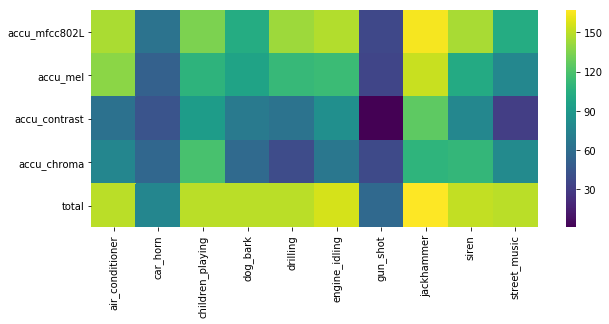

In [110]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.heatmap(accu_df, cmap='viridis');

In [111]:
all_valid_pred_df[all_valid_pred_df['pred_mfcc802L'] != all_valid_pred_df['Class']]

,pred_mfcc802L,pred_mel,pred_contrast,pred_chroma,Class
1,jackhammer,jackhammer,jackhammer,jackhammer,street_music
3,siren,jackhammer,jackhammer,gun_shot,dog_bark
13,children_playing,children_playing,children_playing,children_playing,street_music
14,children_playing,street_music,street_music,dog_bark,street_music
23,children_playing,children_playing,jackhammer,children_playing,dog_bark
35,siren,dog_bark,children_playing,children_playing,dog_bark
37,children_playing,engine_idling,dog_bark,dog_bark,street_music
38,children_playing,street_music,children_playing,dog_bark,street_music
41,children_playing,street_music,street_music,children_playing,street_music
48,children_playing,children_playing,dog_bark,drilling,dog_bark
